In [40]:
import pandas as pd

df = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250120地图匹配_v6.xlsx")
df2 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202山东黑龙江青海内蒙古_unmatched_unique.xlsx")

In [20]:
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CITYGB_1990a,CNTYGB_1990a,PROVGB_2000,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,老汉的宝物,宁夏
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,6321.0,632122.0,NaN,NaN,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,6301.0,630100.0,NaN,NaN,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,三姊妹,宁夏
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,6323.0,632321.0,63.0,6323.0,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19791,19792,19791__637麻糊涂,樊树峥,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19792,19793,19792__638你说念啥就念啥,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19793,19794,19793__639白字县令,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19794,19795,19794__640吃 鸡,王俊才,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古


In [21]:
df2.head(

,area,area_corrected,area_id_unique,CNTYGB_1953,CNTYGB_1964,CNTYGB_1982,CNTYGB_1990a,CNTYGB_2000
0,内蒙古一,NaN,1,NaN,NaN,NaN,NaN,NaN
1,内蒙古二,NaN,2,NaN,NaN,NaN,NaN,NaN
2,内蒙古汉族,NaN,3,NaN,NaN,NaN,NaN,NaN
3,内蒙古满族,NaN,4,NaN,NaN,NaN,NaN,NaN
4,内蒙古籽,NaN,5,NaN,NaN,NaN,NaN,NaN


In [41]:
import pandas as pd

# ------------------------------
# 1. 清洗 df2：去除 area_corrected 列取值为空的行
# 这里既考虑 NaN 也考虑空字符串的情况
df2 = df2[df2['area_corrected'].notnull() & (df2['area_corrected'] != '')]

# ------------------------------
# 找出 df_sub 中其 area 列的取值出现在 df2 的 area 列中的行
mask = df['area'].isin(df2['area'])
update_indices = df[mask].index  # 需要更新的行在原 df 中的索引

# 为方便后续更新，构造映射字典：
# 键为 df2 中的原 area 值，值为对应的各个字段取值
mapping_area = df2.set_index('area')['area_corrected']
mapping_CNTYGB_1953 = df2.set_index('area')['CNTYGB_1953']
mapping_CNTYGB_1964 = df2.set_index('area')['CNTYGB_1964']
mapping_CNTYGB_1982 = df2.set_index('area')['CNTYGB_1982']
mapping_CNTYGB_1990a = df2.set_index('area')['CNTYGB_1990a']
mapping_CNTYGB_2000 = df2.set_index('area')['CNTYGB_2000']

# 为了避免后续映射时使用已更新的值，先保存这些行原始的 area 列取值
original_areas = df.loc[update_indices, 'area']

# 对于匹配的行：
# ① 将 df 的 area 列替换为 df2 中对应的 area_corrected 的取值
# ② 同时将 CNTYGB_1953、CNTYGB_1964、CNTYGB_1982、CNTYGB_1990a、CNTYGB_2000 这几列更新为 df2 中对应的取值
df.loc[update_indices, 'area'] = original_areas.map(mapping_area)
df.loc[update_indices, 'CNTYGB_1953'] = original_areas.map(mapping_CNTYGB_1953)
df.loc[update_indices, 'CNTYGB_1964'] = original_areas.map(mapping_CNTYGB_1964)
df.loc[update_indices, 'CNTYGB_1982'] = original_areas.map(mapping_CNTYGB_1982)
df.loc[update_indices, 'CNTYGB_1990a'] = original_areas.map(mapping_CNTYGB_1990a)
df.loc[update_indices, 'CNTYGB_2000'] = original_areas.map(mapping_CNTYGB_2000)

# ------------------------------
# 3. 汇报按照上述步骤校对的行数
num_updated = len(update_indices)
print(f"根据校对步骤更新的行数：{num_updated}")


根据校对步骤更新的行数：982


In [23]:
df

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CITYGB_1990a,CNTYGB_1990a,PROVGB_2000,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,老汉的宝物,宁夏
1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,6301.0,...,6321.0,632122.0,NaN,NaN,NaN,NaN,NaN,NaN,造过麦山的白土城,宁夏
2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,6301.0,...,6301.0,630100.0,NaN,NaN,NaN,NaN,NaN,NaN,伊斯玛悔过,宁夏
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,6301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,三姊妹,宁夏
4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,6323.0,...,6323.0,632321.0,63.0,6323.0,632321.0,NaN,NaN,NaN,老鼠的智慧,宁夏
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19791,19792,19791__637麻糊涂,樊树峥,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19792,19793,19792__638你说念啥就念啥,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19793,19794,19793__639白字县令,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古
19794,19795,19794__640吃 鸡,王俊才,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,内蒙古


In [42]:
county1953 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/国标码/county1953.xls")
county1953.head()

,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCNTY,ECNTY,A53001,A53002
0,71,7100,710000,台湾,Taiwan,台湾,Taiwan,0.0,0.0
1,44,4460,446020,广东,Guangdong,珠海县,Zhuhai Xian,27523.0,126146.0
2,44,4490,449039,广东,Guangdong,南沙群岛,Nansha Qun Dao,0.0,0.0
3,44,4490,449037,广东,Guangdong,西沙群岛,Xisha Qun Dao,0.0,0.0
4,44,4490,449038,广东,Guangdong,中沙群岛,Zhongsha Qun Dao,0.0,0.0


In [43]:
county1964 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/国标码/county1964.xls")
county1982 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/国标码/County1982.xls")
county1990 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/国标码/County1990a.xls")
county2000 = pd.read_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/国标码/County2000.xls")

In [28]:
county2000.head()

,AREA,PERIMETER,PROVGB,CITYGB,CNTYGB,CPROV,EPROV,CCITY,ECITY,CCNTY,...,L2000220,L2000221,L2000222,L2000223,L2000224,L2000225,L2000226,L2000227,L2000228,L2000229
0,0.007,0.377,33,3306,330602,浙江,Zhejiang,绍兴市,Shaoxing,越城区,...,16972,3270,10331,9911,12336,7906,10219,6086,2469,1468
1,0.009,0.478,33,3306,330621,浙江,Zhejiang,绍兴市,Shaoxing,绍兴县,...,19139,5226,9086,15279,9772,14593,18951,1935,2044,1435
2,0.003,0.260,11,1101,110101,北京,Beijing,北京市辖区,Beijing (Districts),东城区,...,16139,41,7574,8606,7129,9051,1410,4475,10027,268
3,0.003,0.246,11,1101,110102,北京,Beijing,北京市辖区,Beijing (Districts),西城区,...,22607,32,12923,9716,14319,8320,1746,8827,11491,575
4,0.002,0.233,11,1101,110103,北京,Beijing,北京市辖区,Beijing (Districts),崇文区,...,11640,51,4195,7496,4946,6745,885,2433,7052,1321


In [44]:
import pandas as pd
import numpy as np

# 假设你已经加载了 df, county1953, county1964, county1982, county1990, county2000
# 例如：
# df = pd.read_csv('df.csv')
# county1953 = pd.read_csv('county1953.csv')
# county1964 = pd.read_csv('county1964.csv')
# county1982 = pd.read_csv('county1982.csv')
# county1990 = pd.read_csv('county1990.csv')
# county2000 = pd.read_csv('county2000.csv')

# 从第 17264 行开始更新（假设行号从 0 开始计数）
start_index = 17264

# 定义年份配置（注意：df 中1990年的后缀为 '1990a'）
year_list = ['1953', '1964', '1982', '1990a', '2000']
county_dfs = {
    '1953': county1953,
    '1964': county1964,
    '1982': county1982,
    '1990a': county1990,  # df 中的列名为 CNTYGB_1990a，但对应的 county 表是 county1990
    '2000': county2000
}

for year_suffix in year_list:
    # 定义 df 中的列名
    cntygb_col = f'CNTYGB_{year_suffix}'
    provgb_col = f'PROVGB_{year_suffix}'
    citygb_col = f'CITYGB_{year_suffix}'
    
    # 获取当前年份对应的 county 对照表，并对 CNTYGB 列去重（保留第一次出现的记录）
    county_df = county_dfs[year_suffix]
    county_unique = county_df.drop_duplicates(subset='CNTYGB', keep='first')
    
    # 构造映射 Series：索引为 CNTYGB，值为对应的 PROVGB 和 CITYGB
    mapping_provgb = county_unique.set_index('CNTYGB')['PROVGB']
    mapping_citygb = county_unique.set_index('CNTYGB')['CITYGB']
    
    # 获取 df 中从 start_index 行开始的子集
    df_sub = df.iloc[start_index:]
    
    # 找出 df_sub 中 CNTYGB_xxx 列的值在 county_unique 中存在的行
    mask = df_sub[cntygb_col].isin(county_unique['CNTYGB'])
    indices_found = df_sub[mask].index  # 有匹配的行
    indices_not_found = df_sub[~mask].index  # 没有匹配的行
    
    # 对于找到匹配的行，根据映射更新 PROVGB 和 CITYGB 列
    df.loc[indices_found, provgb_col] = df.loc[indices_found, cntygb_col].map(mapping_provgb)
    df.loc[indices_found, citygb_col] = df.loc[indices_found, cntygb_col].map(mapping_citygb)
    
    # 对于没有找到对应的行，将 CNTYGB_xxx 置为空值
    df.loc[indices_not_found, cntygb_col] = np.nan


In [45]:
df.to_excel("/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202地图匹配_v6_new.xlsx")

In [52]:
# 定义需要检查的列
cols_to_check = ["CNTYGB_1953", "CNTYGB_1964", "CNTYGB_1982", "CNTYGB_1990a", "CNTYGB_2000"]

# 从第17264行开始取子集
df_sub = df.iloc[17263:19172]

# 对于 df_sub 的每一行，检查这几列是否全为空值（np.nan）
# isnull() 返回布尔型 DataFrame，然后 all(axis=1) 判断每行所有值是否都为 True
mask_all_empty = df_sub[cols_to_check].isnull().all(axis=1)

# 计算满足条件的行数
num_empty_rows = mask_all_empty.sum()

print("从第17264行开始，以下列全部为空值的行数量：", num_empty_rows)

从第17264行开始，以下列全部为空值的行数量： 51


In [53]:
df_sub

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,CITYGB_1990a,CNTYGB_1990a,PROVGB_2000,CITYGB_2000,CNTYGB_2000,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group
17263,17264,17263__001盘古开天地,樊兆51夕梁川县丈化局副局长大专,NaN,NaN,NaN,山东济宁市梁山县,NaN,NaN,NaN,...,NaN,370832.0,NaN,NaN,370832.0,NaN,NaN,NaN,NaN,山东
17264,17265,17264__002日月运行,系明集皱文化站,NaN,NaN,NaN,山东东明县,NaN,NaN,NaN,...,3717.0,371728.0,37.0,3717.0,371728.0,NaN,NaN,NaN,NaN,山东
17265,17266,17265__003女蜗补天,刘恩芳女43岁经七路办事处文化站干部初中,NaN,NaN,NaN,山东济南市,NaN,37.0,3701.0,...,3701.0,370100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,山东
17266,17267,17266__004兄妹补天出彩虹,刘亦莲女16岁油郭乡刘普村初中学生,NaN,NaN,NaN,山东东营市,NaN,NaN,NaN,...,3705.0,370500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,山东
17267,17268,17267__005嫦娥奔月,刘恩芳女43岁济南经七路办事处文化站干部初中,NaN,NaN,NaN,山东济南市,NaN,37.0,3701.0,...,3701.0,370100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,山东
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,19168,19167__663拉破袖子,铁全义,NaN,NaN,NaN,青海西宁市大通回族土族自治县,NaN,63.0,6301.0,...,6301.0,630121.0,63.0,6301.0,630121.0,NaN,NaN,NaN,NaN,青海
19168,19169,19168__664亲家母和《金刚经》,井石,NaN,NaN,NaN,青海乐都县,NaN,63.0,6301.0,...,6321.0,632123.0,63.0,6321.0,632123.0,NaN,NaN,NaN,NaN,青海
19169,19170,19169__665我们的鸡儿常叫,井石,NaN,NaN,NaN,青海乐都县,NaN,63.0,6301.0,...,6321.0,632123.0,63.0,6321.0,632123.0,NaN,NaN,NaN,NaN,青海
19170,19171,19170__666伤 疤’,严涛,NaN,NaN,NaN,青海乐都县,NaN,63.0,6301.0,...,6321.0,632123.0,63.0,6321.0,632123.0,NaN,NaN,NaN,NaN,青海


In [54]:
# 从第 17264 行开始取子集
df_sub = df.iloc[17263:19172]

# 计算子集的总行数
total_rows = df_sub.shape[0]

print("从第17264行开始，df表总共有", total_rows, "行")

从第17264行开始，df表总共有 1909 行


下面开始做spatial join

In [89]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPoint

# ---------------------------
# 文件路径设置
excel_file_path   = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202地图匹配_v6_new.xlsx"
shp_1982_path     = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/china_1982pop/china82.shp"
shp_1990_path     = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/1990/china90a.shp"
shp_2000_path     = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/2000_chinaboundary/china00.shp"
shp_2010_path     = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp"
output_excel_path = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202spatial_join_2010_new.xlsx"

# 目标坐标系：EPSG:4326 (WGS84)
target_crs = "EPSG:4326"

# ---------------------------
# 1. 读取数据
df = pd.read_excel(excel_file_path)

shp_1982 = gpd.read_file(shp_1982_path)
shp_1990 = gpd.read_file(shp_1990_path)
shp_2000 = gpd.read_file(shp_2000_path)
shp_2010 = gpd.read_file(shp_2010_path)

# ---------------------------
# 2. 转换坐标系到 EPSG:4326
for shp in [shp_1982, shp_1990, shp_2000, shp_2010]:
    if shp.crs is None:
        shp.set_crs(target_crs, inplace=True)
    else:
        shp = shp.to_crs(target_crs)

shp_1982 = shp_1982.to_crs(target_crs)
shp_1990 = shp_1990.to_crs(target_crs)
shp_2000 = shp_2000.to_crs(target_crs)
shp_2010 = shp_2010.to_crs(target_crs)

# ---------------------------
# 3. 计算 1982、1990、2000 的中心点
shp_1982['centroid_1982'] = shp_1982.geometry.centroid
shp_1990['centroid_1990'] = shp_1990.geometry.centroid
shp_2000['centroid_2000'] = shp_2000.geometry.centroid

# 提取中心点数据（包含县的 ID，即 CNTYGB）
centroids_1982 = shp_1982[['CNTYGB', 'centroid_1982']]
centroids_1990 = shp_1990[['CNTYGB', 'centroid_1990']]
centroids_2000 = shp_2000[['CNTYGB', 'centroid_2000']]

# ---------------------------
# 4. 将中心点数据合并到 Excel 数据中  
#    Excel 表中对应的县代码字段分别为 CNTYGB_1982, CNTYGB_1990a, CNTYGB_2000  
df = pd.merge(df, centroids_1982, how='left', left_on='CNTYGB_1982', right_on='CNTYGB')
df = df.drop(columns=['CNTYGB'])
df = pd.merge(df, centroids_1990, how='left', left_on='CNTYGB_1990a', right_on='CNTYGB')
df = df.drop(columns=['CNTYGB'])
df = pd.merge(df, centroids_2000, how='left', left_on='CNTYGB_2000', right_on='CNTYGB')
df = df.drop(columns=['CNTYGB'])

# ---------------------------
# 5. 计算综合中心点（结合所有可用的中心点）
def compute_combined_centroid(row):
    pts = [row.get('centroid_1982'), row.get('centroid_1990'), row.get('centroid_2000')]
    valid_pts = [pt for pt in pts if pt is not None]
    if valid_pts:
        multi_pts = MultiPoint(valid_pts)
        return multi_pts.convex_hull.centroid
    return None

df['combined_centroid'] = df.apply(compute_combined_centroid, axis=1)

# ---------------------------
# 6. 利用综合中心点进行空间连接  
#    构建 GeoDataFrame，然后利用 2010 年的 Shapefile 查找每个点所在的县
centroid_gdf = gpd.GeoDataFrame(df, geometry='combined_centroid', crs=target_crs)
joined = gpd.sjoin(centroid_gdf, shp_2010, how='left', predicate='within')
df['matched_gbcode'] = joined['gbcode']

# ---------------------------
# 7. 保存结果

df['CNTYGB_2010'] = df['CNTYGB_2010'].fillna(df['matched_gbcode'])
df.to_excel(output_excel_path, index=False, engine='openpyxl')

/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_89941/2614849359.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1982['centroid_1982'] = shp_1982.geometry.centroid
/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_89941/2614849359.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1990['centroid_1990'] = shp_1990.geometry.centroid
/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_89941/2614849359.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2000['centroid_2000'] = shp_2000.geometry.centroid


In [91]:
df.iloc[:19172]['CNTYGB_2010'].isnull().sum()

1570

统计结果已保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202shapefile2010_gbcode_counts.xlsx


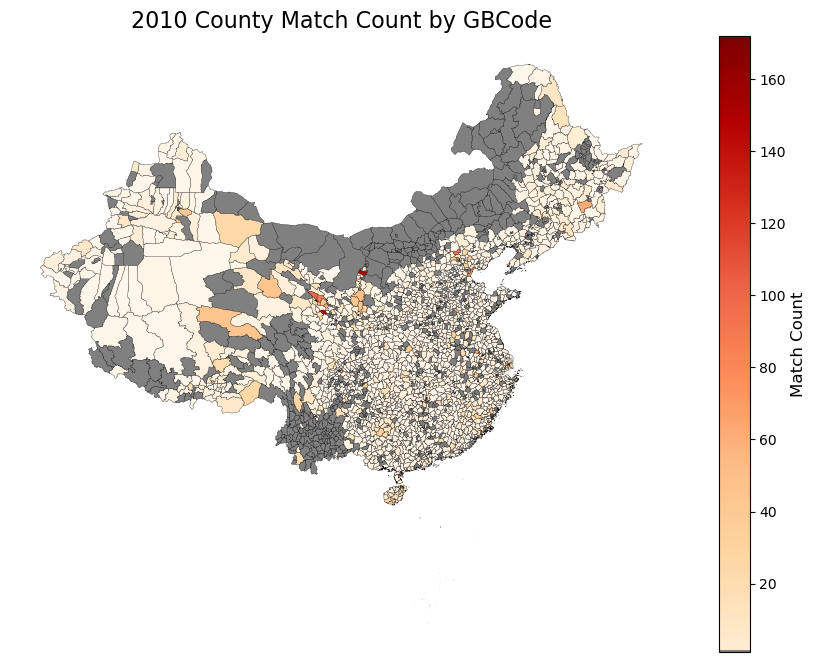

地图已保存到文件: /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202shapefile2010_gbcode_counts_map.png


In [85]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import numpy as np

# 文件路径
shapefile_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/shapefiles_spatial_joins/GIS/export.shp'
excel_file_path   = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202spatial_join_2010.xlsx'
output_excel_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202shapefile2010_gbcode_counts.xlsx'
output_map_path   = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202shapefile2010_gbcode_counts_map.png'

# 读取数据
shapefile_data = gpd.read_file(shapefile_path)
excel_data     = pd.read_excel(excel_file_path)

# 从 shapefile 中提取需要的字段（这里至少包含 gbcode，用于后续合并）
shapefile_gbcode = shapefile_data[['chname', 'ename', 'gbcode']].copy()

# 统计 Excel 表中 matched_gbcode 出现的次数
gbcode_counts = excel_data['matched_gbcode'].value_counts().reset_index()
gbcode_counts.columns = ['gbcode', 'match_count']

# 如果有缺失值，先填充为 0，再转换为整数类型
gbcode_counts['gbcode'] = gbcode_counts['gbcode'].fillna(0).astype(int)

# 同时将 shapefile 中 gbcode 转换为整数类型，便于后续合并
shapefile_gbcode['gbcode'] = shapefile_gbcode['gbcode'].astype(int)
shapefile_data['gbcode']   = shapefile_data['gbcode'].astype(int)

# 将匹配统计结果合并到 shapefile_data 中（左连接保证所有县都保留）
shapefile_data = shapefile_data.merge(gbcode_counts, on='gbcode', how='left')

# 对于没有匹配到的县，match_count 为空，则填充为 0，并转换为整数
shapefile_data['match_count'] = shapefile_data['match_count'].fillna(0).astype(int)

# 将统计结果保存到 Excel 文件中
shapefile_data.to_excel(output_excel_path, index=False)
print(f"统计结果已保存到 {output_excel_path}")

# -------------------------------
# 绘制地图

# 为 match_count 为 0 的县设置特殊颜色
special_color = 'gray'  # 特别颜色，用于 match_count = 0 的区域
color_map_base = plt.cm.OrRd  # 基础颜色映射 "Orange-Red"

# 定义自定义颜色映射，第一种颜色为 special_color，其余由基础 colormap 生成
color_map = ListedColormap([special_color] + list(color_map_base(np.linspace(0.1, 1, 256))))

# 创建颜色归一化范围，排除 match_count 为 0 的情况以获得较好的视觉效果
if (shapefile_data['match_count'] > 0).any():
    vmin = shapefile_data.loc[shapefile_data['match_count'] > 0, 'match_count'].min()
else:
    vmin = 0
vmax = shapefile_data['match_count'].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 根据 match_count 分配颜色，若 match_count==0 则使用 special_color
shapefile_data['color'] = shapefile_data['match_count'].apply(
    lambda x: special_color if x == 0 else color_map_base(norm(x))
)

# 创建图形与坐标轴
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# 绘制地图：以分配好的颜色填充，并设置边界颜色
shapefile_data.plot(
    color=shapefile_data['color'],
    linewidth=0.2, 
    edgecolor='black', 
    ax=ax
)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  # 为颜色条设置数据范围
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Match Count', fontsize=12)

# 添加标题和隐藏坐标轴
ax.set_title('2010 County Match Count by GBCode', fontsize=16)
ax.axis('off')

# 保存地图图像
plt.savefig(output_map_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"地图已保存到文件: {output_map_path}")

In [92]:
df.columns

Index(['Unnamed: 0', 'rowid', 'name', 'cailu', 'provgb', 'citygb', 'cntygb',
       'area', 'geocode', 'PROVGB_1953', 'CITYGB_1953', 'CNTYGB_1953',
       'PROVGB_1964', 'CITYGB_1964', 'CNTYGB_1964', 'PROVGB_1982',
       'CITYGB_1982', 'CNTYGB_1982', 'PROVGB_1990a', 'CITYGB_1990a',
       'CNTYGB_1990a', 'PROVGB_2000', 'CITYGB_2000', 'CNTYGB_2000',
       'PROVGB_2010', 'CITYGB_2010', 'CNTYGB_2010', 'new_name', 'area_group',
       'centroid_1982', 'centroid_1990', 'centroid_2000', 'combined_centroid',
       'matched_gbcode'],
      dtype='object')

In [87]:
df

,Unnamed: 0,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,...,PROVGB_2010,CITYGB_2010,CNTYGB_2010,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode
0,0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,...,NaN,NaN,NaN,老汉的宝物,宁夏,None,None,None,None,NaN
1,1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,...,NaN,NaN,NaN,造过麦山的白土城,宁夏,POINT (102.76606 36.14425),POINT (102.76606 36.14425),None,POINT (102.76606258935416 36.14425184441833),632122
2,2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,...,NaN,NaN,NaN,伊斯玛悔过,宁夏,POINT (101.75324 36.63254),POINT (101.75324 36.63254),None,POINT (101.75323508407591 36.632537677692426),630104
3,3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,...,NaN,NaN,NaN,三姊妹,宁夏,None,None,None,None,NaN
4,4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,...,NaN,NaN,NaN,老鼠的智慧,宁夏,POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.0739790147858 35.423843042544235),632321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19791,19791,19792,19791__637麻糊涂,樊树峥,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,NaN,NaN,NaN,内蒙古,None,None,None,None,NaN
19792,19792,19793,19792__638你说念啥就念啥,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,NaN,NaN,NaN,内蒙古,None,None,None,None,NaN
19793,19793,19794,19793__639白字县令,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,NaN,NaN,NaN,内蒙古,None,None,None,None,NaN
19794,19794,19795,19794__640吃 鸡,王俊才,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,NaN,NaN,NaN,内蒙古,None,None,None,None,NaN


下面来筛选地理位置匹配错误的情况

In [95]:
import geopandas as gpd
import pandas as pd

# 假设 target_crs 已经定义为 "EPSG:4326"，同时 shp_2010 已经加载并转换到该坐标系，
# 并且 df 中已经包含 'centroid_1982', 'centroid_1990', 'centroid_2000' 三个字段

# --- 1. 分别利用各中心点查找对应的2010年县的 gbcode ---

# 对于1982年的中心点
gdf_1982 = gpd.GeoDataFrame(df[['centroid_1982']], geometry='centroid_1982', crs=target_crs)
joined_1982 = gpd.sjoin(gdf_1982, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_1982'] = joined_1982['gbcode']

# 对于1990年的中心点
gdf_1990 = gpd.GeoDataFrame(df[['centroid_1990']], geometry='centroid_1990', crs=target_crs)
joined_1990 = gpd.sjoin(gdf_1990, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_1990'] = joined_1990['gbcode']

# 对于2000年的中心点
gdf_2000 = gpd.GeoDataFrame(df[['centroid_2000']], geometry='centroid_2000', crs=target_crs)
joined_2000 = gpd.sjoin(gdf_2000, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_2000'] = joined_2000['gbcode']

# --- 2. 筛选出三列匹配结果不一致的所有行 ---
# 定义一个函数，对每一行进行检查
def check_inconsistent(row):
    # 收集三个匹配结果的非空值
    values = [row['matched_gbcode_1982'], row['matched_gbcode_1990'], row['matched_gbcode_2000']]
    non_null = [v for v in values if pd.notnull(v)]
    # 如果非空值少于两个，则不比较，返回 False
    if len(non_null) < 2:
        return False
    # 如果至少有两个非空值，判断这些值是否全部相等
    return len(set(non_null)) > 1

# 应用函数得到不一致行的布尔索引
mask_inconsistent = df.apply(check_inconsistent, axis=1)
inconsistent_rows = df[mask_inconsistent]

print("不一致（至少有两个非空匹配结果且不全相等）的行数量：", len(inconsistent_rows))

不一致（至少有两个非空匹配结果且不全相等）的行数量： 885


In [97]:
inconsistent_rows.to_excel('/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202inconsistent_spatial_join_2010.xlsx')

In [98]:
df

,Unnamed: 0,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,...,new_name,area_group,centroid_1982,centroid_1990,centroid_2000,combined_centroid,matched_gbcode,matched_gbcode_1982,matched_gbcode_1990,matched_gbcode_2000
0,0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,青海循化县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,...,老汉的宝物,宁夏,None,None,None,None,NaN,NaN,NaN,NaN
1,1,2,04743__121造过麦山的白土城,missing values,63,6321,632122,青海民和县,"{'lng': 102.83639, 'lat': 36.325561}",63.0,...,造过麦山的白土城,宁夏,POINT (102.76606 36.14425),POINT (102.76606 36.14425),None,POINT (102.76606258935416 36.14425184441833),632122,632122,632122,NaN
2,2,3,05119__496伊斯玛悔过,林昌林,63,6301,630100,青海西宁市,"{'lng': 101.78445, 'lat': 36.623385}",63.0,...,伊斯玛悔过,宁夏,POINT (101.75324 36.63254),POINT (101.75324 36.63254),None,POINT (101.75323508407591 36.632537677692426),630104,630104,630104,NaN
3,3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,青海互助县,"{'lng': 101.964569, 'lat': 36.850022}",63.0,...,三姊妹,宁夏,None,None,None,None,NaN,NaN,NaN,NaN
4,4,5,04849__225老鼠的智慧,missing values,63,6323,632321,青海同仁县,"{'lng': 116.413384, 'lat': 39.910925}",63.0,...,老鼠的智慧,宁夏,POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.07398 35.42384),POINT (102.0739790147858 35.423843042544235),632321,632321,632321,632321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19791,19791,19792,19791__637麻糊涂,樊树峥,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,内蒙古,None,None,None,None,NaN,NaN,NaN,NaN
19792,19792,19793,19792__638你说念啥就念啥,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,内蒙古,None,None,None,None,NaN,NaN,NaN,NaN
19793,19793,19794,19793__639白字县令,张少阳,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,内蒙古,None,None,None,None,NaN,NaN,NaN,NaN
19794,19794,19795,19794__640吃 鸡,王俊才,NaN,NaN,NaN,内蒙古汉族,NaN,NaN,...,NaN,内蒙古,None,None,None,None,NaN,NaN,NaN,NaN


In [99]:
df.loc[mask_inconsistent, 'CNTYGB_2010'] = df.loc[mask_inconsistent, 'matched_gbcode_1982'].fillna(df.loc[mask_inconsistent, 'matched_gbcode_1990'])

In [100]:
df.to_excel('/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202spatial_join_2010_no_inconsistency.xlsx')

In [104]:
import geopandas as gpd
import pandas as pd
import numpy as np

# ---------------------------
# 假设 target_crs 已经定义为 "EPSG:4326"
# 假设 shp_2010 已经加载并转换到目标坐标系，
# 并且 df 中已经包含 'centroid_1982', 'centroid_1990', 'centroid_2000'

# --- 1. 分别利用各中心点查找对应的2010年县的 gbcode ---

# 对于1982年的中心点
gdf_1982 = gpd.GeoDataFrame(df[['centroid_1982']], geometry='centroid_1982', crs=target_crs)
joined_1982 = gpd.sjoin(gdf_1982, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_1982'] = joined_1982['gbcode']

# 对于1990年的中心点
gdf_1990 = gpd.GeoDataFrame(df[['centroid_1990']], geometry='centroid_1990', crs=target_crs)
joined_1990 = gpd.sjoin(gdf_1990, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_1990'] = joined_1990['gbcode']

# 对于2000年的中心点
gdf_2000 = gpd.GeoDataFrame(df[['centroid_2000']], geometry='centroid_2000', crs=target_crs)
joined_2000 = gpd.sjoin(gdf_2000, shp_2010[['gbcode', 'geometry']], how='left', predicate='within')
df['matched_gbcode_2000'] = joined_2000['gbcode']

# 假设 df 中已经有 matched_gbcode 字段（或者你可根据需要添加）

# ---------------------------
# --- 2. 标记不一致的行 ---
# 定义一个函数检查每行的三个匹配结果：
# 如果非空值少于两个，则不计入（返回 False）；
# 如果有两个或三个非空值，则比较这些非空值是否全相等，
# 如果不全相等，则返回 True（不一致）。
def check_inconsistent(row):
    values = [row['matched_gbcode_1982'], row['matched_gbcode_1990'], row['matched_gbcode_2000']]
    non_null = [v for v in values if pd.notnull(v)]
    if len(non_null) < 2:
        return False
    return len(set(non_null)) > 1

# 得到布尔 Series 标记不一致行
mask_inconsistent = df.apply(check_inconsistent, axis=1)

# 同时保存到一个辅助列（后续导出前会删除），便于样式函数判断
df['inconsistent'] = mask_inconsistent

# ---------------------------
# --- 3. 对 mask_inconsistent 的行填充 CNTYGB_2010 ---
# 如果 CNTYGB_2010 为空，则先用 matched_gbcode_1982 填充，如果仍为空则用 matched_gbcode_1990 填充
df.loc[mask_inconsistent, 'CNTYGB_2010'] = df.loc[mask_inconsistent, 'matched_gbcode_1982'].fillna(
    df.loc[mask_inconsistent, 'matched_gbcode_1990']
)

# ---------------------------
# --- 4. 定义样式函数为不一致行的指定列设置红色字体 ---
# 为避免依赖辅助列在导出的结果中显示，我们使用外部保存的 mask_inconsistent 来判断行是否需要样式
incons_mask = mask_inconsistent.copy()

def highlight_inconsistent_row(row):
    styles = pd.Series('', index=row.index)
    # 如果当前行的 index 对应的不一致，则对下面指定的列设置样式
    if incons_mask.loc[row.name]:
        for col in ['matched_gbcode', 'matched_gbcode_1982', 'matched_gbcode_1990', 'matched_gbcode_2000']:
            if col in row.index:
                styles[col] = 'color: red'
    return styles

# ---------------------------
# --- 5. 导出 Excel 文件 ---
# 为了不让辅助列'inconsistent'出现在最终文件中，先删除它
df_export = df.drop(columns=['inconsistent'], errors='ignore')

# 使用 pandas Styler 应用行级样式
styled = df_export.style.apply(highlight_inconsistent_row, axis=1)

# 导出带格式的 Excel 文件（openpyxl支持样式导出，但注意Excel对样式的支持有限）
output_file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202spatial_join_2010_no_inconsistency2.xlsx'
styled.to_excel(output_file_path, engine='openpyxl', index=False)

print(f"Excel 文件已保存到: {output_file_path}")

Excel 文件已保存到: /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/250202spatial_join_2010_no_inconsistency2.xlsx
